In [23]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from matplotlib import figure 
import os
import glob
import time

In [63]:
z = np.array([6,5,6,7,4,4,4])
np.argmin(z)
z.min()

4

In [2]:

## ws stand for window size, window size component 
def img_disparity(img_left, img_right, ws_component):

    img_left = cv2.copyMakeBorder(img_left, ws_component, ws_component, ws_component, ws_component, cv2.BORDER_CONSTANT, None, value = 0)
    img_right = cv2.copyMakeBorder(img_right, ws_component, ws_component, ws_component, ws_component, cv2.BORDER_CONSTANT, None, value = 0)

    x = img_left.shape[1] 
    y = img_left.shape[0]

    print(y)
    print(x)

    disparity = []

    # for i_y in range(1,10):
    for i_y in range(ws_component, y-ws_component):

        if(i_y % 100 == 0):
            print("On row ", i_y) ## Just to help you keep track of progress
        
        right_line_nbhds = []

        ## Calculate all the pixel neighbourhoods for the row in the right image
        for i_x2 in range(ws_component, x-ws_component):
            nbhd_right_img = np.array(img_right[i_y-ws_component:i_y+ws_component+1, i_x2-ws_component:i_x2+ws_component+1,:]).astype(int).flatten() ##.reshape(1,window_size**2)
            right_line_nbhds.append(nbhd_right_img)

        


        right_line_nbhds = np.array(right_line_nbhds).flatten()
        right_line_nbhds = np.tile(right_line_nbhds, x-2*ws_component) ## This replicates the right neighbourhoods
        
        # print(right_line_nbhds[0:100])
        # print("rhnbdhs " , len(right_line_nbhds))

        left_line_nbhds = []

        for i_x2 in range (ws_component, x - ws_component):


            nbhd_left_img = np.array(img_left[i_y-ws_component:i_y+ws_component+1, i_x2-ws_component:i_x2+ws_component+1,:]).astype(int).flatten()
            nbhd_left_img = np.tile(nbhd_left_img, x - 2*ws_component) ## Replicate that specific nbhd by the amount of pixels we consider in a row
            left_line_nbhds.append(nbhd_left_img)




        left_line_nbhds = np.array(left_line_nbhds).flatten()

        # print(left_line_nbhds[0:100])
        # print("left nbdhs " , len(left_line_nbhds))

        difference = ((left_line_nbhds-right_line_nbhds)**2)

        step = ((2*ws_component+1)**2)*3 ## Number of pixels in window * number of colour channels(3)

        ssds = np.array([difference[i:i+step].sum() for i in range(0,len(difference), step )] ) ## Sums the squared difference for intervals of length step 

        min_ssd = np.array([np.argmin(ssds[i:i + (x - 2*ws_component)]) for i in range (0, (x - 2*ws_component)**2, (x - 2*ws_component) )])

        row_disparity = min_ssd - np.linspace(0, x - (2*ws_component + 1) ,num = (x-2*ws_component)).astype(int)

        disparity.append(row_disparity)
    
            
    return disparity

In [91]:
q = np.array([[1,2,3,4],[4,5,6,7]])

q

array([[1, 2, 3, 4],
       [4, 5, 6, 7]])

In [93]:
q[:,1:3]

array([[2, 3],
       [5, 6]])

In [314]:

def return_min_closest(array, index_tobeclose2):

    index_closest_min = np.argmin(  np.abs( np.where(array == array.min())[0] - index_tobeclose2  )  )

    pre_output = np.where(array == array.min())[0]

    output = pre_output[index_closest_min]

    return output 

## ws stand for window size, window size component 
def img_disparityv2(img_left, img_right, ws_component):

    img_left = cv2.copyMakeBorder(img_left, ws_component, ws_component, ws_component, ws_component, cv2.BORDER_CONSTANT, None, value = 0)
    img_right = cv2.copyMakeBorder(img_right, ws_component, ws_component, ws_component, ws_component, cv2.BORDER_CONSTANT, None, value = 0)

    x = img_left.shape[1] 
    y = img_left.shape[0]

    print(y)
    print(x)

    disparity = []

    # for i_y in range(ws_component,ws_component+1):
    for i_y in range(ws_component, y-ws_component):

        if(i_y % 50 == 0):
            print("On row ", i_y) ## Just to help you keep track of progress
        
        right_line_nbhds = []

        ## Calculate all the pixel neighbourhoods for the row in the right image
        for i_x2 in range(ws_component, x-ws_component):
            nbhd_right_img = np.array(img_right[i_y-ws_component:i_y+ws_component+1, i_x2-ws_component:i_x2+ws_component+1,:]).astype(int).flatten() ##.reshape(1,window_size**2)
            right_line_nbhds.append(nbhd_right_img)

        # print(right_line_nbhds[0:2])


        right_line_nbhds = np.array(right_line_nbhds).flatten()
        right_line_nbhds = np.tile(right_line_nbhds, x-2*ws_component) ## This replicates the right neighbourhoods
        
        # print(right_line_nbhds[0:100])
        # print("rhnbdhs " , len(right_line_nbhds))

        left_line_nbhds = []

        for i_x2 in range (ws_component, x - ws_component):


            nbhd_left_img = np.array(img_left[i_y-ws_component:i_y+ws_component+1, i_x2-ws_component:i_x2+ws_component+1,:]).astype(int).flatten()
            
            # if(i_x2 == ws_component):
            #     print("lnbhd",nbhd_left_img)

            nbhd_left_img = np.tile(nbhd_left_img, 881) 

            # nbhd_left_img = np.tile(nbhd_left_img, x - 2*ws_component) ## Replicate that specific nbhd by the amount of pixels we consider in a row
            left_line_nbhds.append(nbhd_left_img)

        


        left_line_nbhds = np.array(left_line_nbhds).flatten()

        # print(left_line_nbhds[0:27])

        # print("Sub : ", left_line_nbhds[27:54] - right_line_nbhds[27:54])

        # print("Subsquared : ", (left_line_nbhds[27:54] - right_line_nbhds[27:54])**2)


        # # print(left_line_nbhds[0:100])
        # # print("left nbdhs " , len(left_line_nbhds))

        difference = ((left_line_nbhds-right_line_nbhds)**2)

        # print("dif", len(difference))

        step = ((2*ws_component+1)**2)*3 ## Number of pixels in window * number of colour channels(3)

        ssds = np.array([difference[i:i+step].sum() for i in range(0,len(difference), step )] ) ## Sums the squared difference for intervals of length step 

        # print(len(ssds))

        # print("ssds ", ssds[871:1742])

        # min_ssd = np.array([np.argmin(ssds[i:i + (x - 2*ws_component)]) for i in range (0, (x - 2*ws_component)**2, (x - 2*ws_component) )])

        # min_ssd = np.array([np.argmin(ssds[i:i + 881]) for i in range (0, 881**2, 881 )])

        # print(min_ssd) kjbzsdrg;kjbzsrgfkjb;zsrgbjkrgbjk;rge

        # min_ssdv2 = np.array(  [ np.abs(( (np.where(ssds[i:i + (x - 2*ws_component)] == ssds[i:i + (x - 2*ws_component)].min()  ))[0] - i/(x - 2*ws_component) )).min()     for i in range (0, (x - 2*ws_component)**2, (x - 2*ws_component) )])
        # min_ssdv2 = np.array(  [ np.abs(( (np.where(  ssds[i:i + 881] == ssds[i:i + 881].min()  ))[0] - i/(881) )).min()     for i in range (0, 881**2, 881 )])

        min_ssdv2 = np.array( [ return_min_closest(ssds[i:i + 881], i/881)   for i in range (0, 881**2, 881 )])

        # print("v2 ", min_ssdv2)
        # row_disparity = min_ssd - np.linspace(0, x - (2*ws_component + 1) ,num = (x-2*ws_component)).astype(int)

        # row_disparityv2 = min_ssdv2 - np.linspace(0, x - (2*ws_component + 1) ,num = (x-2*ws_component)).astype(int)
        row_disparityv2 = np.linspace(0, 880 ,num = 881).astype(int) - min_ssdv2 

        disparity.append(row_disparityv2)
    
            
    return disparity



    



In [276]:
np.argmin(np.array([1,1,1,1,0,1]))

4

In [309]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder`

left = cv2.imread(base_path + '/Dataset/2018-07-09-16-11-56_2018-07-09-16-55-15-689-left.jpg')
right = cv2.imread(base_path + '/Dataset/2018-07-09-16-11-56_2018-07-09-16-55-15-689-right.jpg')

disparityv2 = img_disparityv2(left, right, ws_component = 3)

406
887


In [313]:
disparityv2

[array([   0,    0,    0,  -34,  -34,  -33,  -33,  -33,  -32,  -32,  -35,
         -35,  -35,  -35,    1,    1, -812, -810,    1,    2,  -29,   18,
          19,   19,   19,   19,   19,   19,   19,   19,   19,   19,   19,
          19,   19,   19,   18,   18,   18,   18,   19,   19,   19,   19,
          19,   19,   19,   20,   19,   19,   19,   19,   19,   19,   19,
          16,   17,   17,   18,   18,   18,   17,   18,   24,   18,   19,
          18,   18,   18,   19,   18,   18,   18,   18,   18,   18,   18,
          18,   18,   18,   18,   18,   18,   19,   19,   19,   19,   19,
          19,   19,   19,   19,   19,   19,   19,   18,   18,   18,   18,
          18,   18,   18,   18,   17,   17,   17,   17,   17,   17,   17,
          17,   18,   37,   -2,   -2,   -2,   -2,   -2,   -2,   -1,   15,
          16,   16,   16,   16,   16,   16,   16,   16,   16,   16,   16,
          16,   16,   16,   16,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,    0,    2, 

Version three - where we only check pixels to the left

In [315]:

def return_min_closestv3(array, index_tobeclose2):

    index_closest_min = np.argmax( ( np.where(array == array.min() )[0]) - index_tobeclose2  ) 

    pre_output = np.where(array == array.min())[0]

    output = pre_output[index_closest_min]

    return output 

## ws stand for window size, window size component 
def img_disparityv3(img_left, img_right, ws_component):

    img_left = cv2.copyMakeBorder(img_left, ws_component, ws_component, ws_component, ws_component, cv2.BORDER_CONSTANT, None, value = 0)
    img_right = cv2.copyMakeBorder(img_right, ws_component, ws_component, ws_component, ws_component, cv2.BORDER_CONSTANT, None, value = 0)

    x = img_left.shape[1] 
    y = img_left.shape[0]

    # print(y)
    # print(x)

    disparity = []

    # for i_y in range(ws_component,ws_component+1):
    for i_y in range(ws_component, y-ws_component):

        if(i_y % 50 == 0):
            print("On row ", i_y) ## Just to help you keep track of progress
        
        right_line_nbhds = []

        # ## Calculate all the pixel neighbourhoods for the row in the right image

        for i_x2 in range(ws_component, x-ws_component):

            nbhd_right_img = np.array(img_right[i_y-ws_component:i_y+ws_component+1, i_x2-ws_component:i_x2+ws_component+1,:]).astype(int).flatten() ##.reshape(1,window_size**2)
            right_line_nbhds.append(nbhd_right_img)

        right_line_nbhds = np.array([np.array(right_line_nbhds[0:i]).flatten() for i in range(1,881+1)])
        right_line_nbhds = np.hstack(right_line_nbhds)

        # print("rnbhd", len(right_line_nbhds))
        # print(right_line_nbhds[0:2])


        # right_line_nbhds = np.array(right_line_nbhds).flatten()
        # right_line_nbhds = np.tile(right_line_nbhds, x-2*ws_component) ## This replicates the right neighbourhoods
        
        # print(right_line_nbhds[0:100])
        # print("rhnbdhs " , len(right_line_nbhds))

        

        left_line_nbhds = []

        for i_x2 in range (ws_component, x - ws_component):

            # print("Shleem ", i_x2 - ws_component + 1)

            # nbhd_right_img = np.array(img_right[i_y-ws_component:i_y+ws_component+1, i_x2-ws_component:i_x2+ws_component+1,:]).astype(int).flatten() ##.reshape(1,window_size**2)
            # nbhd_right_img = np.tile(nbhd_right_img, i_x2 - ws_component + 1)
            # right_line_nbhds.append(nbhd_right_img)

            nbhd_left_img = np.array(img_left[i_y-ws_component:i_y+ws_component+1, i_x2-ws_component:i_x2+ws_component+1,:]).astype(int).flatten()
            nbhd_left_img = np.tile(nbhd_left_img, i_x2 - ws_component + 1) 
            left_line_nbhds.append(nbhd_left_img)

        # print(len(np.array(left_line_nbhds).flatten()))
        # print(left_line_nbhds[0:3])


        # left_line_nbhds = np.array(left_line_nbhds).flatten()
        left_line_nbhds = np.hstack(np.array(left_line_nbhds))

        # print(left_line_nbhds)

        # print("Flat: , ", len(left_line_nbhds))

        difference = ((left_line_nbhds-right_line_nbhds)**2)



        step = ((2*ws_component+1)**2)*3 ## Number of pixels in window * number of colour channels(3)

        # ssds = np.array([difference[i:i+step*i].sum() for i in range(0,len(difference), step )] ) ## Sums the squared difference for intervals of length step 

        # tile_groupings = (np.linspace(0,881,882)*step)


        tile_groupings = np.linspace(0,881,882)

        # print(tile_groupings[0:6])

        ssds = np.array([difference[i:i+step].sum() for i in range(0,len(difference), step )] ) ## Sums the squared difference for intervals of length step 

        # print(len(ssds))

        # ssds = np.array([difference[i:i+tile_groupings[i]].sum() for i in range(0,len(difference), step )] ) ## Sums the squared difference for intervals of length step 

        groupings = [ (i**2)/2 - i/2 for i in range (1,883)] ## I had to use the quadratic formula to solve this, haha! 

        # print(groupings)


        # print("wtf" , wtf)

        # min_ssdv3 = [np.argmin(ssds[groupings[i]:groupings[i+1]]) for i in range (0,881)] 

        min_ssdv3 = [ return_min_closestv3(ssds[int(groupings[i]):int(groupings[i+1])], i) for i in range (0,881)] 

        # print(min_ssdv3)

        # min_ssdv3 = [ ssds[groupings[i]:groupings[i+1]] for i in range (0,881)] 

        
        # print(min_ssdv3)


        # min_ssd = np.array([np.argmin(ssds[i:i + 881]) for i in range (0, 881**2, 881 )])




        # min_ssdv2 = np.array( [ return_min_closest(ssds[i:i + 881], i/881)   for i in range (0, 881**2, 881 )])

        row_disparityv3 = np.linspace(0, 880 ,num = 881).astype(int) - min_ssdv3 

        disparity.append(row_disparityv3)
    
            
    return disparity



    



In [212]:
x = np.array([1,2,3])
np.tile(x,1)

array([1, 2, 3])

In [149]:
disparity

[array([   0,    0,    0,    0,    0,    0,   52,   51,   51,  153,   -4,
          -5,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,
          -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,
          -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,
          -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,
          -6,   -6,   -6,   -6,   -6,   -4,   -5,   -6,   -6,   -7,   -7,
          -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,
          -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,   -6,
          -6,   -6,   -6,   -6,   -5,   -5,   -5,   -6,   -6,   -5,   -5,
          -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,
          -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,
          -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,
          -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,   -5,
          -5,   -5,   -5,   -5,   -5, 

Test for method 3. 

In [303]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder`

left = cv2.imread(base_path + '/Dataset/2018-07-09-16-11-56_2018-07-09-16-55-15-689-left.jpg')
right = cv2.imread(base_path + '/Dataset/2018-07-09-16-11-56_2018-07-09-16-55-15-689-right.jpg')

disparityv3 = img_disparityv3(left, right, ws_component = 1)

/var/folders/b4/7ptvpcjn0jq8_vq3_fjnmxrc0000gn/T/ipykernel_78268/3294563.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  right_line_nbhds = np.array([np.array(right_line_nbhds[0:i]).flatten() for i in range(1,881+1)])
/var/folders/b4/7ptvpcjn0jq8_vq3_fjnmxrc0000gn/T/ipykernel_78268/3294563.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  left_line_nbhds = np.hstack(np.array(left_line_nbhds))


On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(400, 881)


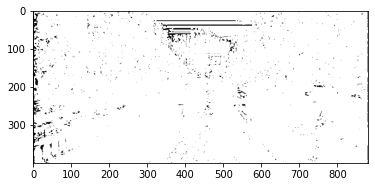

In [306]:
plt.imshow(disparityv3)

disparityv3 = np.array(disparityv3)*256
print(disparityv3.shape)
disparityv3 = np.repeat(disparityv3, 3)
disparityv3 = disparityv3.reshape(400,881,3)

disparityv3

plt.imshow(disparityv3)


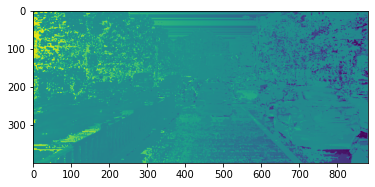

In [208]:
plt.imshow(disparityv2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(400, 881)


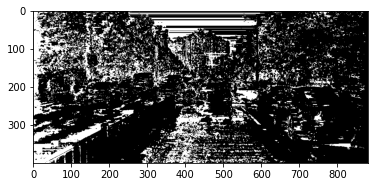

In [209]:


# print(disparityv2.shape)
disparityv3 = np.array(disparityv2)*256
print(disparityv3.shape)
disparityv3 = np.repeat(disparityv3, 3)
disparityv3 = disparityv3.reshape(400,881,3)

disparityv3

plt.imshow(disparityv3)


This just prints the images paths that have been sorted

In [3]:
data_dir = os.getcwd() + '/Dataset/*.jpg'
img_files = glob.glob(data_dir)

img_files.sort() ## Sorts images so <img>left and <img>right are next to eachother. 

# window_size_components = [1, 3, 6] ## Remember window size component is 2*window_size_component+1

all_disparties_ws3 = []

i = 0 
for i in img_files:
    print(i)

/Users/oliverbestel/Desktop/Documents/Work/COMP90086/Tuts/P1/CV_Project/Dataset/2018-07-09-16-11-56_2018-07-09-16-11-56-702-left.jpg
/Users/oliverbestel/Desktop/Documents/Work/COMP90086/Tuts/P1/CV_Project/Dataset/2018-07-09-16-11-56_2018-07-09-16-11-56-702-right.jpg
/Users/oliverbestel/Desktop/Documents/Work/COMP90086/Tuts/P1/CV_Project/Dataset/2018-07-09-16-11-56_2018-07-09-16-13-38-366-left.jpg
/Users/oliverbestel/Desktop/Documents/Work/COMP90086/Tuts/P1/CV_Project/Dataset/2018-07-09-16-11-56_2018-07-09-16-13-38-366-right.jpg
/Users/oliverbestel/Desktop/Documents/Work/COMP90086/Tuts/P1/CV_Project/Dataset/2018-07-09-16-11-56_2018-07-09-16-14-54-205-left.jpg
/Users/oliverbestel/Desktop/Documents/Work/COMP90086/Tuts/P1/CV_Project/Dataset/2018-07-09-16-11-56_2018-07-09-16-14-54-205-right.jpg
/Users/oliverbestel/Desktop/Documents/Work/COMP90086/Tuts/P1/CV_Project/Dataset/2018-07-09-16-11-56_2018-07-09-16-16-13-272-left.jpg
/Users/oliverbestel/Desktop/Documents/Work/COMP90086/Tuts/P1/CV_Pr

**The way I have set this up is so each code block tests a single image. This is done incase any failures happen. Just queue up the code cells to run.**

Image 25

In [4]:


base_path = os.getcwd() ## Make sure you are in the CV_Project Folder`
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path + '/Dataset/2018-07-09-16-11-56_2018-07-09-16-55-15-689-left.jpg')
right = cv2.imread(base_path + '/Dataset/2018-07-09-16-11-56_2018-07-09-16-55-15-689-right.jpg')
i = 0 

# while i < 10:

disps_img25 = []

for w in window_size_components:

    start = time.time()

    disparity = img_disparity(left, right, ws_component = w)

    end = time.time()

    disps_img25.append(disparity)

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img25_disps",arr = disps_img25) 

    


402
883
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 3  833.859947681427
404
885
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 5  1167.7977411746979
408
889
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 9  2571.6179990768433
412
893
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 13  10283.71558022499


Image 24

In [5]:

base_path = os.getcwd() ## Make sure you are in the CV_Project Folder
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-52-31-770-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-52-31-770-right.jpg')

i = 0 

# while i < 10:

disps_img24 = []  ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparity(left, right, ws_component = w)

    end = time.time()

    disps_img24.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img24_disps",arr = disps_img24) ###


402
883
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 3  756.5267579555511
404
885
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 5  1086.2829258441925
408
889
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 9  2363.917815923691
412
893
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 13  12825.528765916824


Image 23

In [6]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-right.jpg')

i = 0 

# while i < 10:

disps_img23 = []  ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparity(left, right, ws_component = w)

    end = time.time()

    disps_img23.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img23_disps",arr = disps_img23) ###

402
883
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 3  970.5382063388824
404
885
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 5  1205.3110709190369
408
889
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 9  2375.9031779766083
412
893
On row  100
On row  200
On row  300
On row  400
Time taken for ws = 13  15299.463114976883


Image 22

In [80]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-49-27-623-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-49-27-623-right.jpg')

i = 0 

# while i < 10:

disps_img22 = []  ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparity(left, right, ws_component = w)

    end = time.time()

    disps_img22.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img22_disps",arr = disps_img22) ###

402
883
On row  100


KeyboardInterrupt: 

Image 21

In [ ]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-46-51-712-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-46-51-712-right.jpg')

i = 0 

# while i < 10:

disps_img21 = []  ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparity(left, right, ws_component = w)

    end = time.time()

    disps_img21.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img5_disps",arr = disps_img21) ###

In [8]:
img23_disps = np.load("img23_disps.npy")

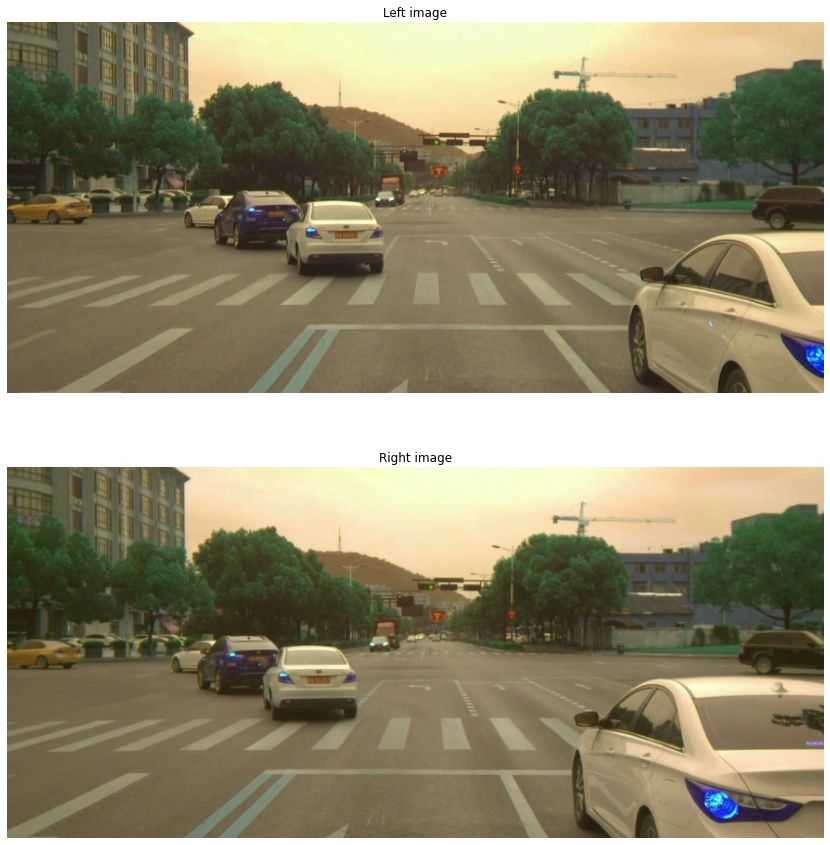

In [29]:

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-right.jpg')


# l = plt.title("Left Image")
# l.figure(figsize = (10,5))
# plt.axis('off')
# plt.imshow(left)

plt.subplots(figsize=(15, 15)) 

plt.subplot(2,1,1)
plt.imshow(left)  
plt.title('Left image')
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(right)  
plt.title('Right image')
plt.axis('off')

plt.show() 


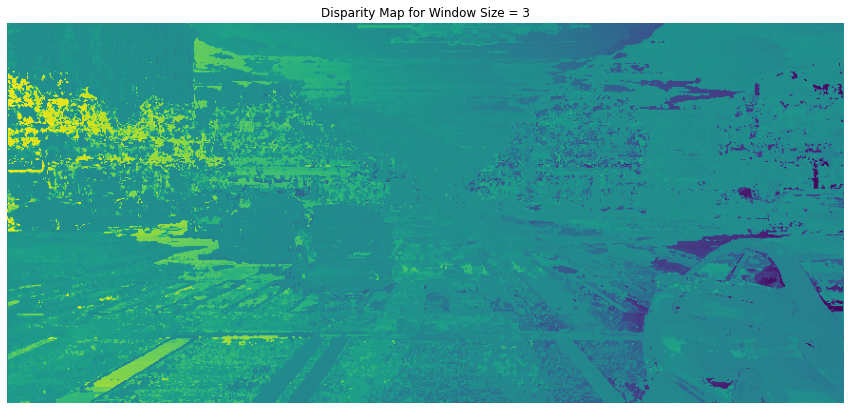

In [34]:
ws3 = img23_disps[0]

plt.figure(figsize = (15,15))
plt.title("Disparity Map for Window Size = 3")
plt.axis('off')
plt.imshow(ws3)

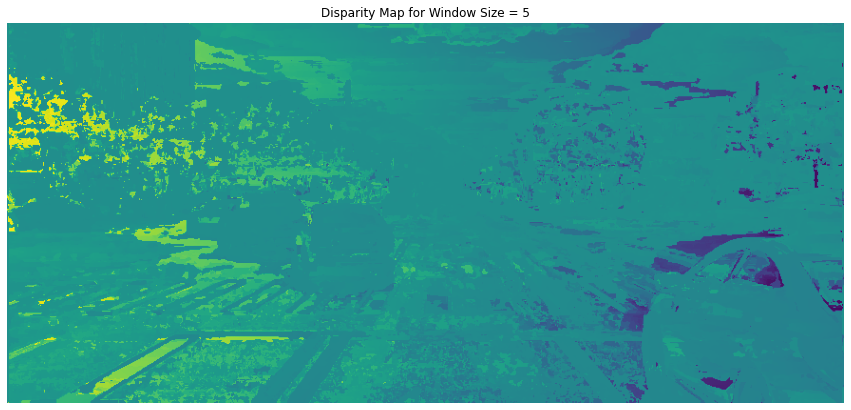

In [35]:
ws5 = img23_disps[1]

plt.figure(figsize = (15,15))
plt.title("Disparity Map for Window Size = 5")
plt.axis('off')
plt.imshow(ws5)

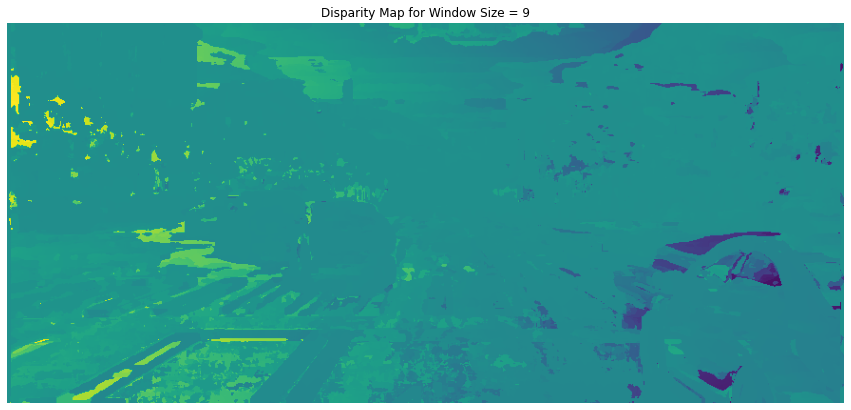

In [36]:
ws9 = img23_disps[2]

plt.figure(figsize = (15,15))
plt.title("Disparity Map for Window Size = 9")
plt.axis('off')
plt.imshow(ws9)

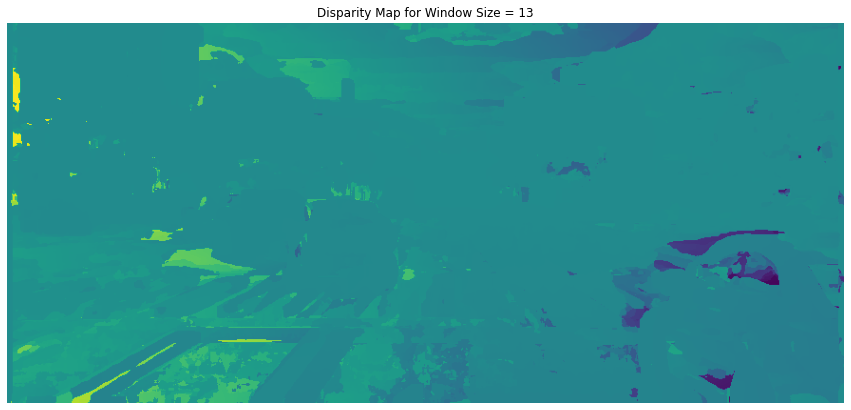

In [37]:
ws13 = img23_disps[3]
ws13*256

plt.figure(figsize = (15,15))
plt.title("Disparity Map for Window Size = 13")
plt.axis('off')
plt.imshow(ws13)

Calculating the statistics

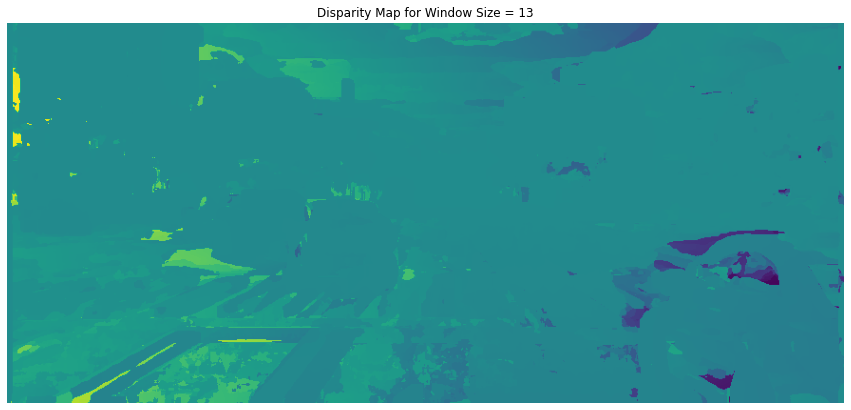

In [47]:
plt.figure(figsize = (15,15))
plt.title("Disparity Map for Window Size = 13")
plt.axis('off')
ws13v2 = ws13*256
plt.imshow(ws13v2)

In [38]:
import disparity_stats as ds

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(400, 881)
(400, 881)


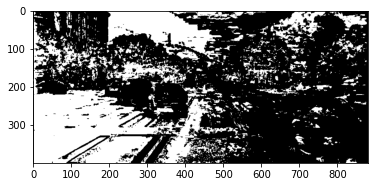

In [79]:
print(ws13.shape)
ws13v2 = ws5*256
print(ws13v2.shape)
ws13v2 = np.repeat(ws13v2, 3)
ws13v2 = ws13v2.reshape(400,881,3)

plt.imshow(ws13v2)

# ws13v2.shape

In [41]:
true_disp_23 = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-disparity.png')

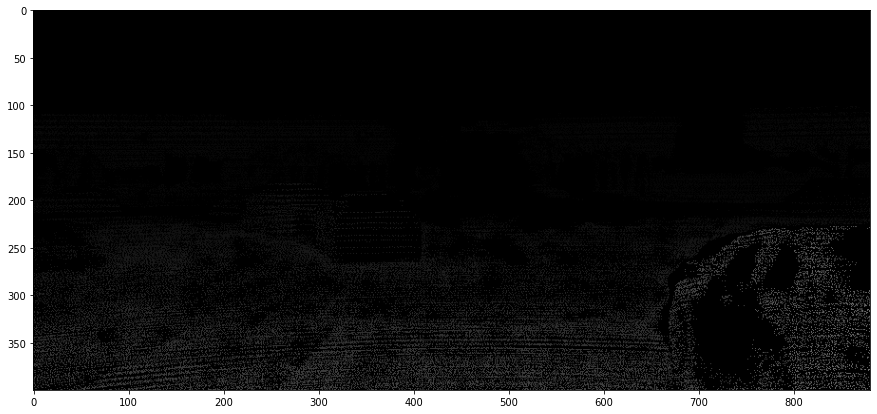

In [43]:

plt.figure(figsize = (15,15))
plt.imshow(true_disp_23)

Testing the new versions of the methods. 

25 v3

In [316]:

base_path = os.getcwd() ## Make sure you are in the CV_Project Folder`
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path + '/Dataset/2018-07-09-16-11-56_2018-07-09-16-55-15-689-left.jpg')
right = cv2.imread(base_path + '/Dataset/2018-07-09-16-11-56_2018-07-09-16-55-15-689-right.jpg')
i = 0 

# while i < 10:

disps_img25v3 = [] ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparityv3(left, right, ws_component = w) ###

    end = time.time()

    disps_img25v3.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img25_dispsv3",arr = disps_img25v3)  ###


/var/folders/b4/7ptvpcjn0jq8_vq3_fjnmxrc0000gn/T/ipykernel_78268/3294563.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  right_line_nbhds = np.array([np.array(right_line_nbhds[0:i]).flatten() for i in range(1,881+1)])
/var/folders/b4/7ptvpcjn0jq8_vq3_fjnmxrc0000gn/T/ipykernel_78268/3294563.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  left_line_nbhds = np.hstack(np.array(left_line_nbhds))


On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 3  444.77953910827637
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 5  610.2517919540405
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 9  1326.2274401187897
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 13  2519.5656130313873


24 v3

In [317]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-52-31-770-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-52-31-770-right.jpg')

i = 0 

# while i < 10:

disps_img24v3 = []  ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparityv3(left, right, ws_component = w) ###

    end = time.time()

    disps_img24v3.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img24_dispsv3",arr = disps_img24v3) ###

/var/folders/b4/7ptvpcjn0jq8_vq3_fjnmxrc0000gn/T/ipykernel_78268/3294563.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  right_line_nbhds = np.array([np.array(right_line_nbhds[0:i]).flatten() for i in range(1,881+1)])
/var/folders/b4/7ptvpcjn0jq8_vq3_fjnmxrc0000gn/T/ipykernel_78268/3294563.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  left_line_nbhds = np.hstack(np.array(left_line_nbhds))


On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 3  465.50372290611267
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 5  635.6459670066833
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 9  1292.7001249790192
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 13  2528.744292974472


23v3

In [318]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-right.jpg')

i = 0 

# while i < 10:

disps_img23v3 = []  ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparityv3(left, right, ws_component = w)

    end = time.time()

    disps_img23v3.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img23_dispsv3",arr = disps_img23v3) ###

/var/folders/b4/7ptvpcjn0jq8_vq3_fjnmxrc0000gn/T/ipykernel_78268/3294563.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  right_line_nbhds = np.array([np.array(right_line_nbhds[0:i]).flatten() for i in range(1,881+1)])
/var/folders/b4/7ptvpcjn0jq8_vq3_fjnmxrc0000gn/T/ipykernel_78268/3294563.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  left_line_nbhds = np.hstack(np.array(left_line_nbhds))


On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 3  440.2496428489685
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 5  628.6773209571838
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 9  1304.4462792873383
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 13  2538.972933292389


Testing Method Version 2

24v2

In [ ]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-52-31-770-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-52-31-770-right.jpg')

i = 0 

# while i < 10:

disps_img24v2 = []  ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparityv2(left, right, ws_component = w) ###

    end = time.time()

    disps_img24v2.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img24_dispsv2",arr = disps_img24v2) ###

23v2

In [319]:
base_path = os.getcwd() ## Make sure you are in the CV_Project Folder
window_size_components = [1, 2, 4, 6] ## Remember window size component is 2*window_size_component+1

left = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-left.jpg')
right = cv2.imread(base_path +'/Dataset/2018-07-09-16-11-56_2018-07-09-16-51-40-823-right.jpg')

i = 0 

# while i < 10:

disps_img23v2 = []  ###

for w in window_size_components:

    start = time.time()

    disparity = img_disparityv2(left, right, ws_component = w)

    end = time.time()

    disps_img23v2.append(disparity) ###

    print("Time taken for ws = {} ".format(2*w+1) , end - start)




np.save("img23_dispsv2",arr = disps_img23v2) ###

402
883
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 3  829.0426139831543
404
885
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 5  1171.5495438575745
408
889
On row  50
On row  100
On row  150
On row  200
On row  250
On row  300
On row  350
On row  400
Time taken for ws = 9  2754.3328969478607
412
893


KeyboardInterrupt: 